In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

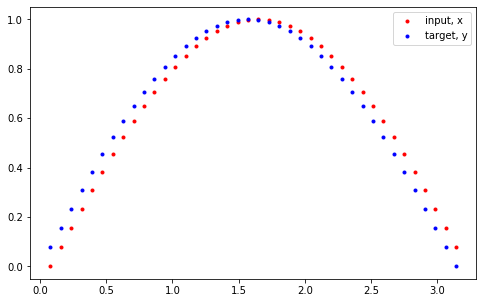

In [2]:
plt.figure(figsize=(8,5))

# how many time steps/data pts are in one batch of data
seq_length = 40

# generate evenly spaced data pts
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1)) # size becomes (seq_length+1, 1), adds an input_size dimension

x = data[:-1] # all but the last piece of data
y = data[1:] # all but the first

# display the data
plt.plot(time_steps[1:], x, 'r.', label='input, x') # x
plt.plot(time_steps[1:], y, 'b.', label='target, y') # y

plt.legend(loc='best')
plt.show()

In [66]:
class RNN(nn.Module):
    def __init__(self,input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        
                # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x, hidden):
#         hidden = 
        batch_size = x.size(0) #[0]
        
        out, hidden = self.rnn(x, hidden)
           # shape output to be (batch_size*seq_length, hidden_dim)
#         r_out = out.view(-1,batch_size, self.hidden_dim)  
        r_out = out
        # get final output 
        output = self.fc(r_out)
        
        return output, hidden,out
        

In [67]:
# test that dimensions are as expected
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2,).to(device)

In [68]:

# generate evenly spaced, test data pts
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0) # give it a batch_size of 1 as first dimension
test_input.to(device);

# print('Input size: ', test_input.size())

In [69]:
output, hidden,out = test_rnn(test_input, None)

In [70]:
out.shape

torch.Size([1, 40, 10])

In [62]:
hidden.shape

torch.Size([2, 1, 10])

In [63]:
output.shape

torch.Size([1, 40, 1])

In [64]:

# decide on hyperparameters
input_size=1 
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)


RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
